## ***STOCK PRICE PREDICTION SYSTEM***

In [ ]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import math
from datetime import datetime
import pandas_datareader as data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#GET THE STOCK DATA
start='2010-01-01'
end= '2019-12-31'

df = yf.download('TATAMOTORS.NS', start, end,)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140808,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472488,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552780,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349594,16495776
...,...,...,...,...,...,...
2019-12-23,176.850006,179.000000,174.149994,176.050003,176.050003,27192195
2019-12-24,177.649994,178.000000,174.649994,175.500000,175.500000,20560311
2019-12-26,175.899994,176.449997,174.100006,174.600006,174.600006,18785333


In [ ]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140808,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472488,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552780,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349594,16495776


In [ ]:
df=df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,156.303482,164.040497,156.184769,163.535919,27906448
1,162.259598,167.147186,153.246277,160.686478,23669317
2,162.200241,162.932388,159.311234,160.933823,14990820
3,161.171280,161.923218,154.344498,155.432831,22722030
4,156.323273,159.251862,155.343781,156.283707,16495776


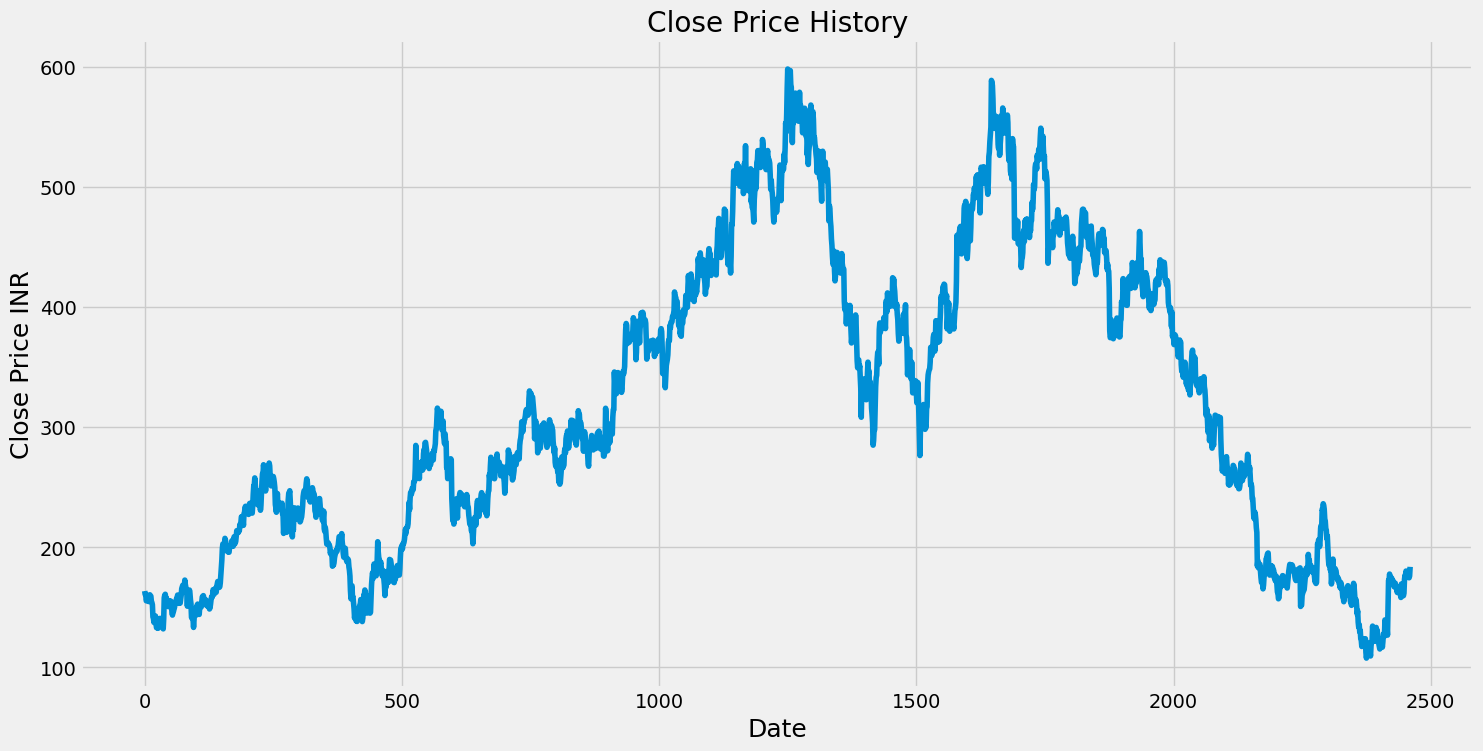

In [ ]:
#VISUALIZE THE CLOSING PRICE HISTORY
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [ ]:
#MOVING AVERAGE OF 100 DAYS
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2456    141.9570
2457    142.2690
2458    142.5435
2459    142.9295
2460    143.4320
Name: Close, Length: 2461, dtype: float64

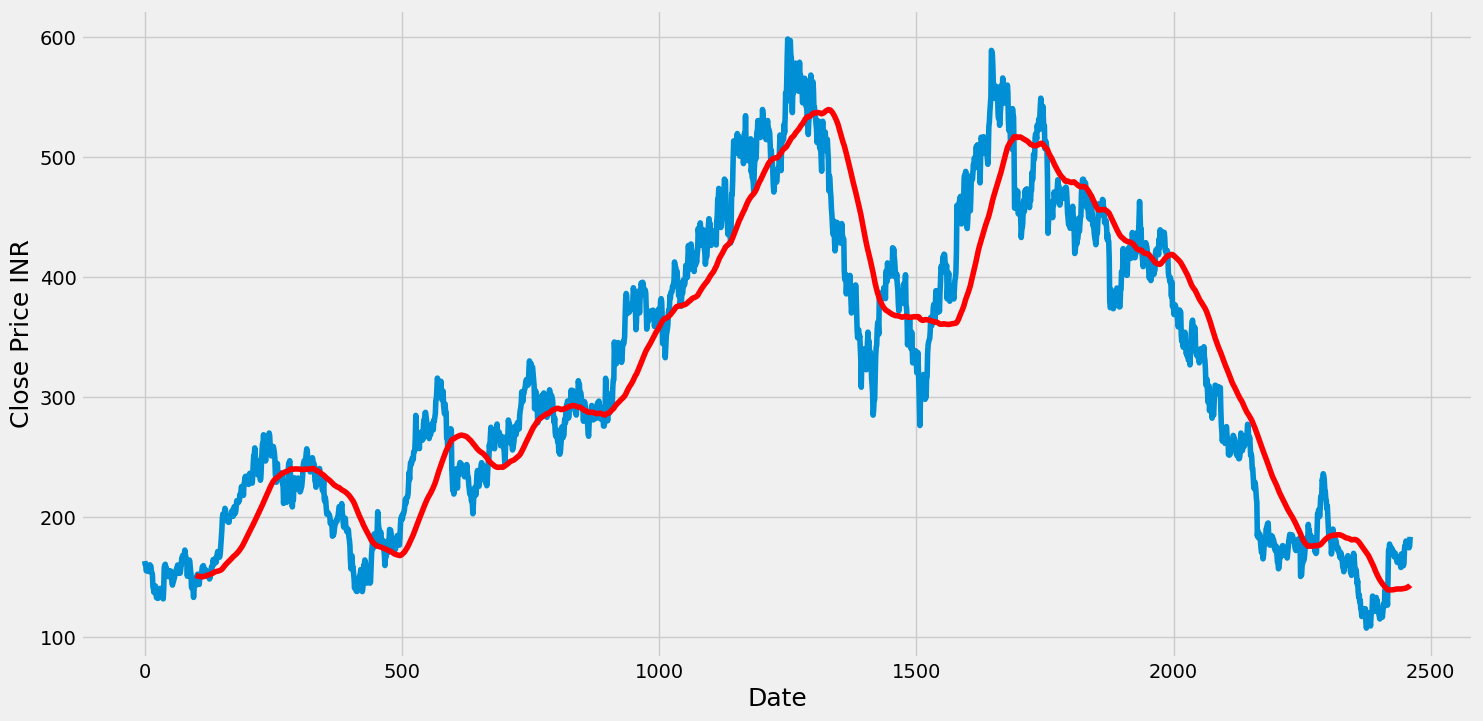

In [ ]:
#VISUALIZE THE MA
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [ ]:
#MOVING AVERAGE OF 200 DAYS
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2456    161.48375
2457    161.48250
2458    161.44225
2459    161.43625
2460    161.46750
Name: Close, Length: 2461, dtype: float64

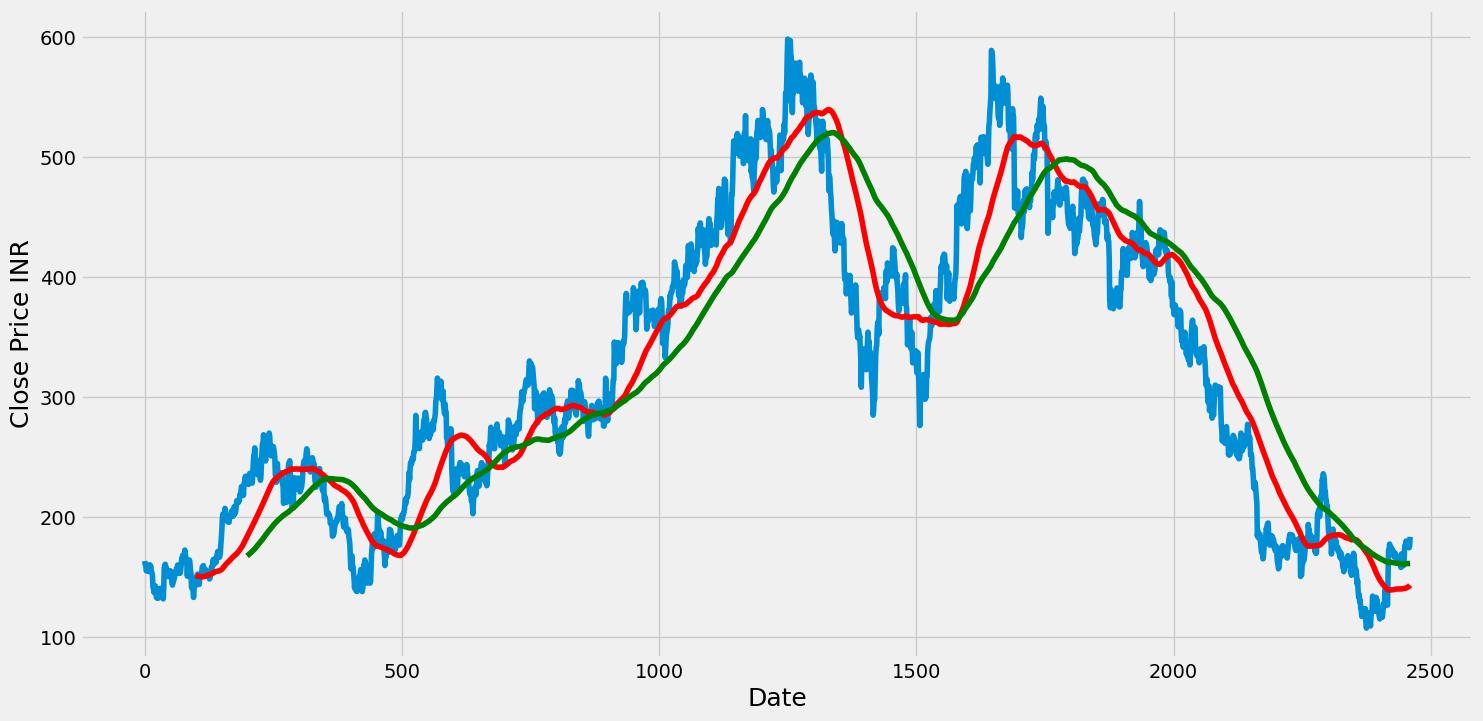

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1722, 1)
(739, 1)


In [ ]:
#SCALE THE DATA
scaler = MinMaxScaler(feature_range= (0,1))

data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.06752712],
       [0.06141337],
       [0.06194407],
       ...,
       [0.71574195],
       [0.69900633],
       [0.71853127]])

In [ ]:
#CREATE THE TRAINING DATA SET
x_train=[]
y_train=[]

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i ,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
model= Sequential()
model.add(LSTM(units=50 , activation = 'relu' , return_sequences= True ,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60 , activation = 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80 , activation = 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units= 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
51/51 [==============================] - 14s 198ms/step - loss: 0.0501
Epoch 2/50
51/51 [==============================] - 11s 220ms/step - loss: 0.0137
Epoch 3/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0102
Epoch 4/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0091
Epoch 5/50
51/51 [==============================] - 10s 187ms/step - loss: 0.0088
Epoch 6/50
51/51 [==============================] - 10s 191ms/step - loss: 0.0087
Epoch 7/50
51/51 [==============================] - 10s 197ms/step - loss: 0.0071
Epoch 8/50
51/51 [==============================] - 10s 197ms/step - loss: 0.0072
Epoch 9/50
51/51 [==============================] - 10s 198ms/step - loss: 0.0071
Epoch 10/50
51/51 [==============================] - 10s 197ms/step - loss: 0.0066
Epoch 11/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0068
Epoch 12/50
51/51 [==============================] - 9s 184ms/step - loss: 0.0063
Epoch 13/50
51

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.tail(100)

,Close
2361,135.600006
2362,129.550003
2363,130.699997
2364,123.750000
2365,122.500000
...,...
2456,176.050003
2457,175.500000
2458,174.600006
2459,176.149994


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-19-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.83274426],
       [0.80166316],
       [0.77068604],
       [0.8155925 ],
       [0.84968818],
       [0.8463617 ],
       [0.8442827 ],
       [0.82276508],
       [0.82234925],
       [0.8505197 ],
       [0.83139292],
       [0.8372141 ],
       [0.84064444],
       [0.83638252],
       [0.82380458],
       [0.8239085 ],
       [0.81216216],
       [0.80280665],
       [0.82338875],
       [0.86819122],
       [0.87588355],
       [0.8939709 ],
       [0.90634098],
       [0.9192307 ],
       [1.        ],
       [0.99729732],
       [0.99064449],
       [0.96787939],
       [0.92671518],
       [0.94137212],
       [0.93523904],
       [0.91683992],
       [0.92879418],
       [0.91632017],
       [0.91933475],
       [0.93711019],
       [0.92588353],
       [0.88898124],
       [0.88201664],
       [0.89875258],
       [0.87027022],
       [0.88804567],
       [0.90041575],
       [0.91943867],
       [0.93960502],
       [0.92255718],
       [0.95218295],
       [0.944

In [ ]:
#CREATE TESTING DATA SET
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(739, 100, 1)
(739,)


In [ ]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 52ms/step


In [ ]:
y_test

array([0.73939708, 0.75509352, 0.75738044, 0.78866939, 0.77629937,
       0.78783781, 0.82006234, 0.81091474, 0.81590433, 0.84937628,
       0.85561328, 0.85353428, 0.84646563, 0.8704782 , 0.86486487,
       0.86226612, 0.88097713, 0.86382537, 0.88357589, 0.901975  ,
       0.91725575, 0.90280666, 0.88274424, 0.86455297, 0.90343033,
       0.88108106, 0.86257789, 0.86933465, 0.82972968, 0.84272345,
       0.84230762, 0.83544694, 0.82661118, 0.77827438, 0.68347194,
       0.70332639, 0.71777548, 0.72297298, 0.72962575, 0.73253634,
       0.73731808, 0.72785859, 0.72567566, 0.71049897, 0.73596674,
       0.73232849, 0.75488561, 0.74812886, 0.7382536 , 0.74823284,
       0.75135135, 0.75270269, 0.76039502, 0.77598753, 0.76673595,
       0.76569645, 0.76101869, 0.7322245 , 0.75925153, 0.75405402,
       0.74230768, 0.75821203, 0.75124736, 0.74989602, 0.74459459,
       0.75405402, 0.76049894, 0.75987527, 0.74968811, 0.76340953,
       0.75790019, 0.74189185, 0.71860706, 0.70997922, 0.69854

In [ ]:
y_predicted

array([[0.72675383],
       [0.72279096],
       [0.72046363],
       [0.72029686],
       [0.72300094],
       [0.7281556 ],
       [0.7350699 ],
       [0.743551  ],
       [0.75289786],
       [0.7623092 ],
       [0.77178717],
       [0.7813337 ],
       [0.7905884 ],
       [0.7987268 ],
       [0.805768  ],
       [0.811597  ],
       [0.8160299 ],
       [0.8196305 ],
       [0.8222724 ],
       [0.8244916 ],
       [0.82724226],
       [0.8312365 ],
       [0.836161  ],
       [0.8406582 ],
       [0.84295714],
       [0.843652  ],
       [0.843004  ],
       [0.8406944 ],
       [0.8371738 ],
       [0.8314947 ],
       [0.82435703],
       [0.8171687 ],
       [0.8108088 ],
       [0.8055009 ],
       [0.79914224],
       [0.78453696],
       [0.7625834 ],
       [0.7386954 ],
       [0.71857315],
       [0.70573735],
       [0.7000526 ],
       [0.7004416 ],
       [0.70475364],
       [0.7106347 ],
       [0.7157104 ],
       [0.7193192 ],
       [0.72128874],
       [0.722

In [ ]:
scaler.scale_

array([0.002079])

In [ ]:
scale_factor = 1/0.00988704

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

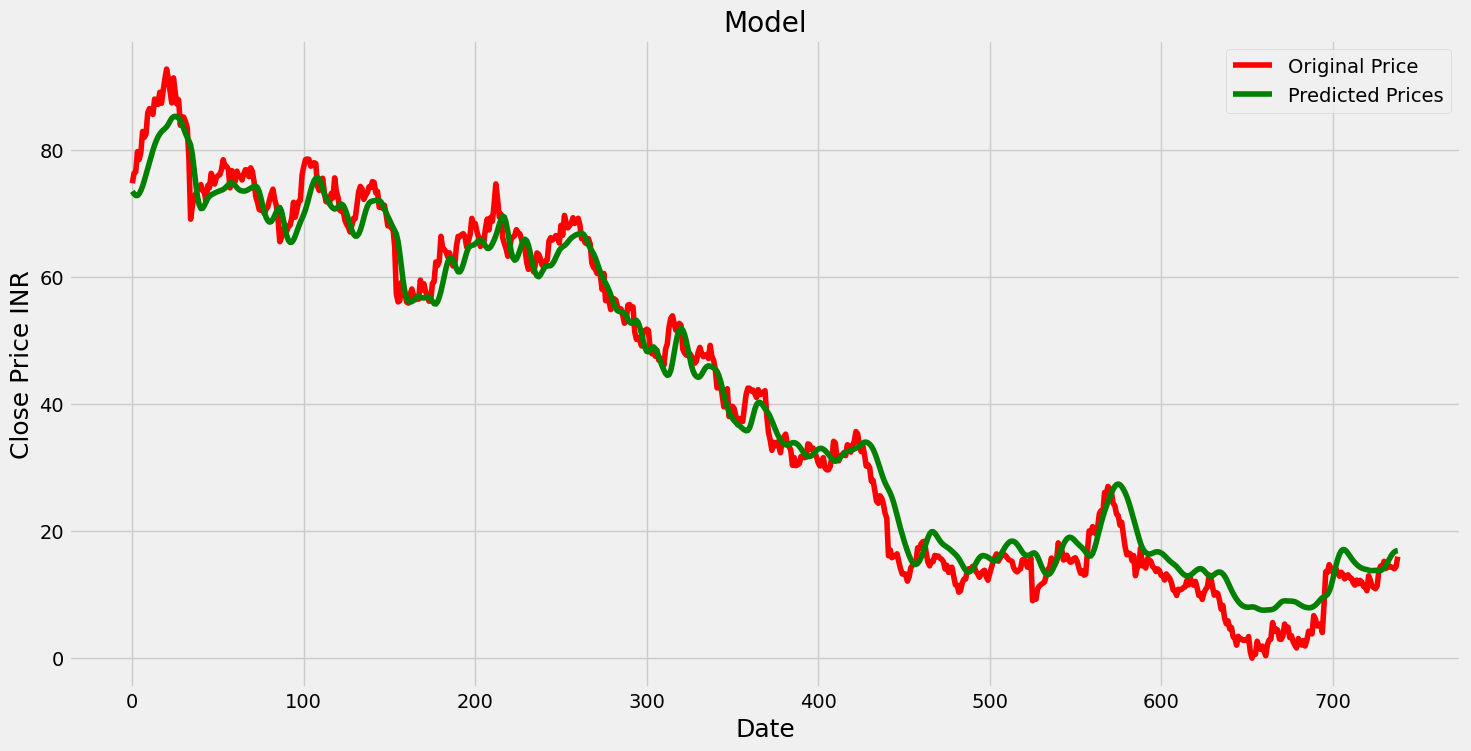

In [ ]:
#VISUALIZE THE DATA
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(y_test, 'r', label = 'Original price')
plt.plot(y_predicted, 'g', label = 'Predicted price')
plt.legend(['Original Price', 'Predicted Prices'])
plt.show()